# Explort OOP yolo pipeline and SAM synthesized images

In [1]:
import os
os.chdir("..")
ROOT = os.getcwd()
DIR_DATA = os.path.join(ROOT, "data")
PATH_IMG = os.path.join(DIR_DATA, "raw", "fire_ant_activity", "A1", "A1_1.JPEG")
print("ROOT:", ROOT)

ROOT: /Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/finding_ants


In [2]:
from libs import split_img, compute_area, get_quantile_area
from PIL import Image
image = Image.open(PATH_IMG)

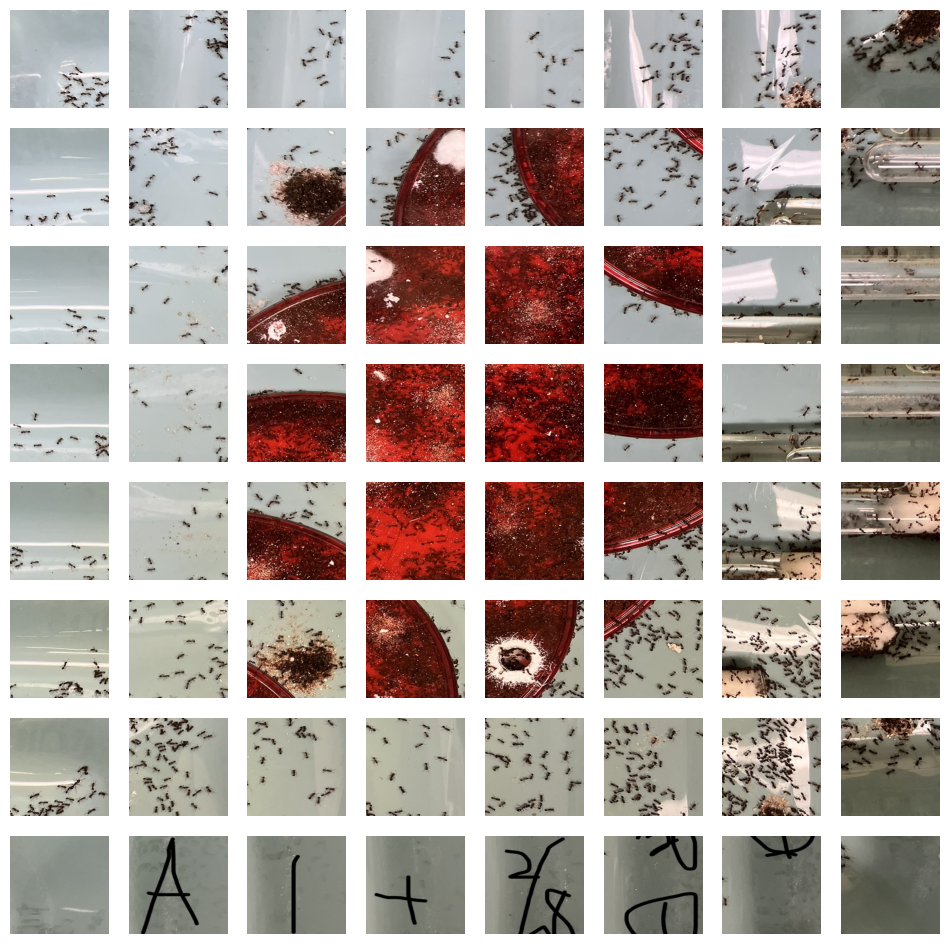

In [148]:
import supervision as sv
RATE = 8
ls_imgs = split_img(image, rate=RATE, newsize=(640, 640))
sv.plot_images_grid(
    ls_imgs,
    grid_size=(RATE, RATE),
)

In [149]:
from ultralytics import YOLO
from detections import Niche_CV_Object
DEVICE = "mps"
model = YOLO(os.path.join(ROOT, "models", "yolov8m.pt"))

In [150]:
results = model.predict(ls_imgs, device=DEVICE)


0: 640x640 (no detections), 1: 640x640 3 birds, 2 kites, 2: 640x640 4 birds, 3: 640x640 4 birds, 1 kite, 4: 640x640 5 birds, 3 kites, 5: 640x640 1 bird, 6: 640x640 1 kite, 7: 640x640 (no detections), 8: 640x640 2 birds, 9: 640x640 4 birds, 1 kite, 10: 640x640 2 birds, 1 cake, 11: 640x640 1 bird, 12: 640x640 (no detections), 13: 640x640 3 birds, 1 fork, 14: 640x640 5 birds, 15: 640x640 (no detections), 16: 640x640 2 birds, 17: 640x640 3 kites, 18: 640x640 1 person, 1 bird, 1 kite, 19: 640x640 (no detections), 20: 640x640 (no detections), 21: 640x640 (no detections), 22: 640x640 6 kites, 23: 640x640 1 bird, 24: 640x640 6 birds, 2 kites, 25: 640x640 1 person, 5 birds, 26: 640x640 (no detections), 27: 640x640 (no detections), 28: 640x640 (no detections), 29: 640x640 (no detections), 30: 640x640 1 bird, 1 kite, 31: 640x640 1 person, 32: 640x640 8 birds, 33: 640x640 1 bird, 3 kites, 34: 640x640 1 bird, 35: 640x640 (no detections), 36: 640x640 (no detections), 37: 640x640 1 skis, 38: 640x640

In [157]:
# check all classes
for result in results:
    print(result.boxes.cls)

tensor([])
tensor([33., 14., 14., 14., 33.], device='mps:0')
tensor([14., 14., 14., 14.], device='mps:0')
tensor([14., 14., 14., 14., 33.], device='mps:0')
tensor([14., 14., 14., 33., 33., 33., 14., 14.], device='mps:0')
tensor([14.], device='mps:0')
tensor([33.], device='mps:0')
tensor([])
tensor([14., 14.], device='mps:0')
tensor([14., 14., 14., 33., 14.], device='mps:0')
tensor([14., 14., 55.], device='mps:0')
tensor([14.], device='mps:0')
tensor([])
tensor([42., 14., 14., 14.], device='mps:0')
tensor([14., 14., 14., 14., 14.], device='mps:0')
tensor([])
tensor([14., 14.], device='mps:0')
tensor([33., 33., 33.], device='mps:0')
tensor([33., 14.,  0.], device='mps:0')
tensor([])
tensor([])
tensor([])
tensor([33., 33., 33., 33., 33., 33.], device='mps:0')
tensor([14.], device='mps:0')
tensor([33., 14., 14., 14., 14., 33., 14., 14.], device='mps:0')
tensor([14., 14., 14., 14., 14.,  0.], device='mps:0')
tensor([])
tensor([])
tensor([])
tensor([])
tensor([14., 33.], device='mps:0')
tens

In [168]:
results[1].boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[5.3243e+02, 5.6376e+02, 6.1643e+02, 6.2279e+02, 6.5655e-01, 3.3000e+01],
        [3.3005e+02, 2.7214e+01, 4.6710e+02, 9.5276e+01, 4.2180e-01, 1.4000e+01],
        [3.1882e+02, 9.9283e+01, 4.0700e+02, 1.5638e+02, 3.2812e-01, 1.4000e+01],
        [5.5675e+02, 4.1246e+02, 6.3972e+02, 4.6251e+02, 2.7493e-01, 1.4000e+01],
        [4.4793e+02, 6.2802e+02, 5.1377e+02, 6.3979e+02, 2.5799e-01, 3.3000e+01]], device='mps:0')
cls: tensor([33., 14., 14., 14., 33.], device='mps:0')
conf: tensor([0.6566, 0.4218, 0.3281, 0.2749, 0.2580], device='mps:0')
data: tensor([[5.3243e+02, 5.6376e+02, 6.1643e+02, 6.2279e+02, 6.5655e-01, 3.3000e+01],
        [3.3005e+02, 2.7214e+01, 4.6710e+02, 9.5276e+01, 4.2180e-01, 1.4000e+01],
        [3.1882e+02, 9.9283e+01, 4.0700e+02, 1.5638e+02, 3.2812e-01, 1.4000e+01],
        [5.5675e+02, 4.1246e+02, 6.3972e+02, 4.6251e+02, 2.7493e-01, 1.4000e+01],
        [4.4793e+02, 6.2802e+02, 5.1377e+02

In [179]:
thred = get_quantile_area(results, quantile=0.8)
print("thred:", thred)

thred: 5050.42041015625


In [181]:

class Niche_CV_Object(sv.Detections):
    def __init__(self, image, xyxy, thred=1e9):
        xyxy = preprocess_xyxy(xyxy, thred)
        super().__init__(xyxy)
        self.image = image
        self.mask = None

    def set_mask_by_sam(self, sam_predictor):
        self.mask = seg_by_sam(sam_predictor, self.image, self.xyxy)

    def plot_image(self, figsize=(8, 8)):
        annt_img = self.get_annotated_img()
        sv.plot_image(annt_img, figsize)

    def get_annotated_img(self):
        annotated_image = self.image.copy()
        # annotate mask
        if self.mask is not None:
            annotator = sv.MaskAnnotator()
            annotated_image = annotator.annotate(annotated_image, self)
        # annotate box
        annotator = sv.BoxAnnotator()
        annotated_image = annotator.annotate(annotated_image, self)
        return annotated_image

    def get_bbox_img(self, resize=None):
        ls_imgs = []
        for xyxy in self.xyxy:
            x1, y1, x2, y2 = xyxy
            img_crop = Image.fromarray(self.image[y1:y2, x1:x2])
            if resize is not None:
                img_crop = img_crop.resize(resize)
            ls_imgs.append(img_crop)
        return ls_imgs

ls_det = []
for i, result in enumerate(results):
    xyxy = result.boxes.xyxy.cpu().numpy()
    obj = Niche_CV_Object(ls_imgs[i], xyxy, thred)
    ls_det.append(obj)

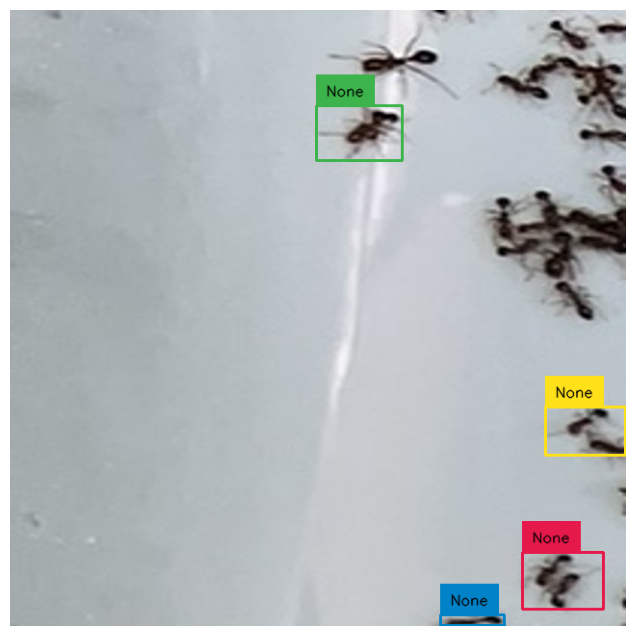

In [177]:
ls_det[1].plot_image()

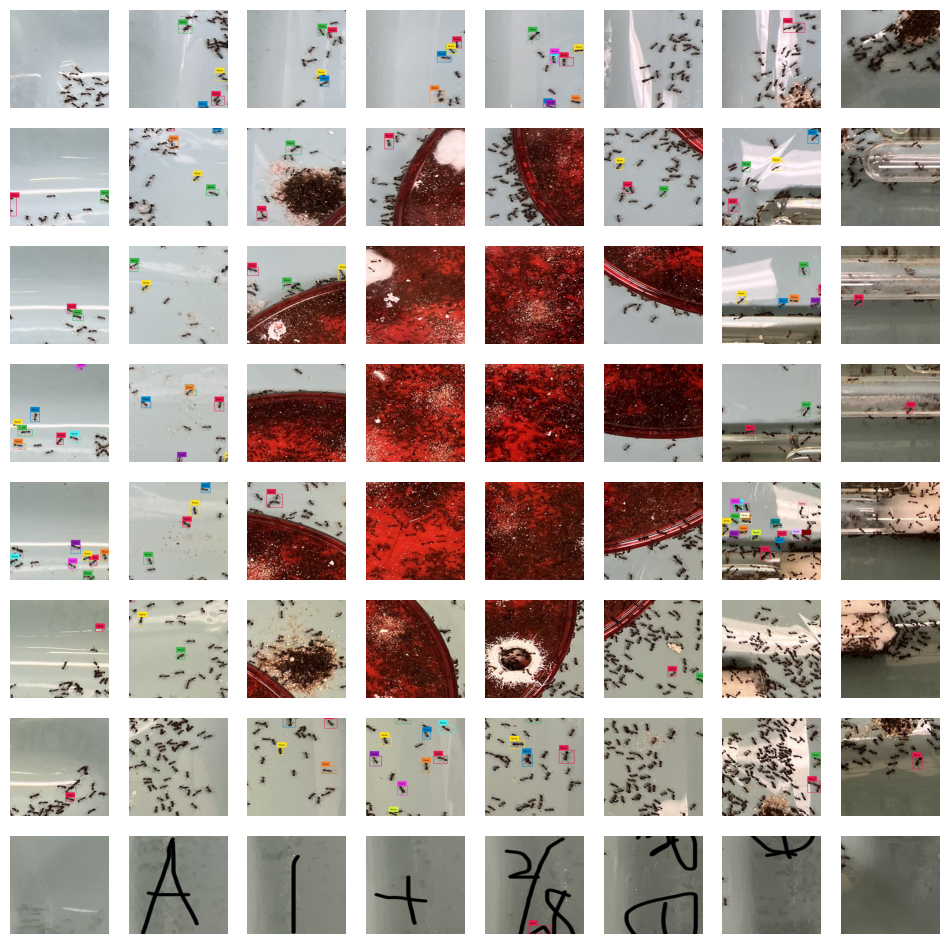

In [178]:
sv.plot_images_grid(
    [det.get_annotated_img() for det in ls_det],
    grid_size=(RATE, RATE),
)

## Create YOLO dataset

In [135]:
ls_imgs = []
for det in ls_det:
    if len(det) > 0:
        ls_imgs.extend(det.get_bbox_img(resize=(640, 640)))

In [137]:
len(ls_imgs)

115

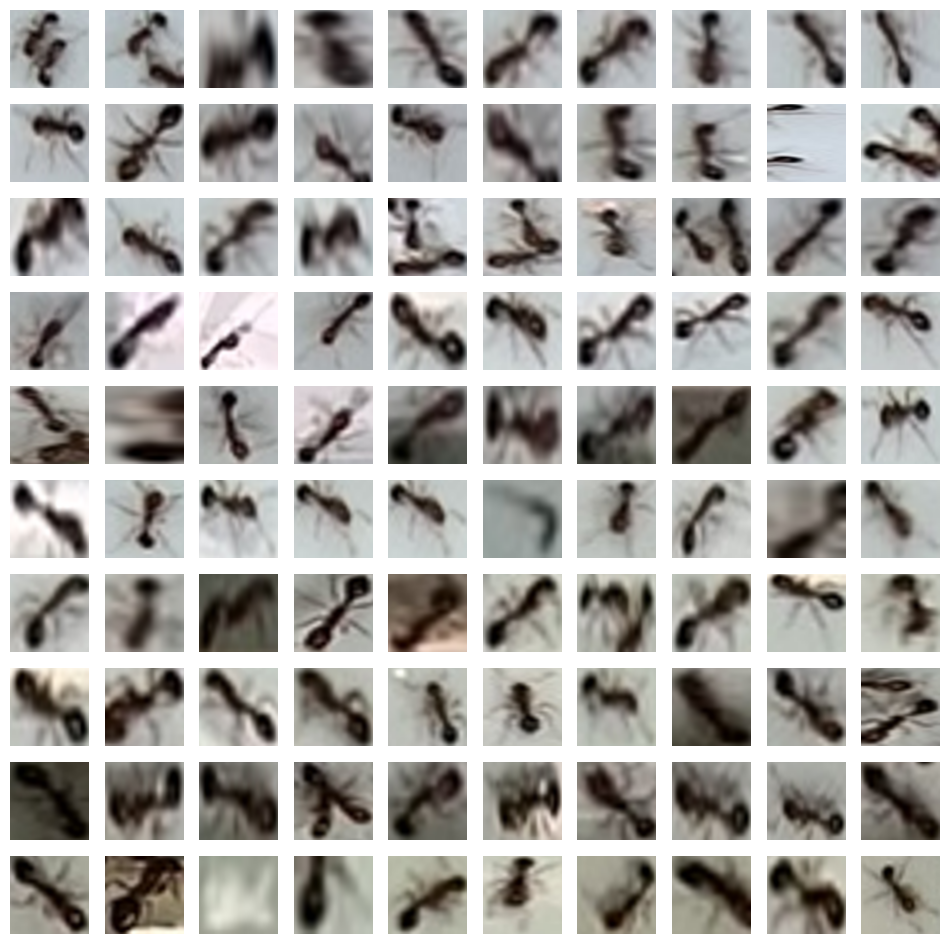

In [139]:
sv.plot_images_grid(
    [np.array(i) for i in ls_imgs[:100]],
    grid_size=(10, 10),
)

In [142]:
# export YOLO
DIR_OUT = os.path.join(ROOT, "data", "yolo_ant")
PATH_YAML = os.path.join(DIR_OUT, "data.yaml")
DIR_TRAIN = os.path.join(DIR_OUT, "train")
DIR_IMGS = os.path.join(DIR_TRAIN, "images")
DIR_LABELS = os.path.join(DIR_TRAIN, "labels")
if not os.path.exists(DIR_OUT):
    os.mkdir(DIR_OUT)
if not os.path.exists(DIR_TRAIN):
    os.mkdir(DIR_TRAIN)
if not os.path.exists(DIR_IMGS):
    os.mkdir(DIR_IMGS)
if not os.path.exists(DIR_LABELS):
    os.mkdir(DIR_LABELS)

In [143]:
# create yaml file for yolov5
with open(PATH_YAML, "w") as f:
    f.write(
        f"""
            train: {DIR_TRAIN}
            val: {DIR_TRAIN}
            nc: 1
            names: ['ant']
        """)

# create train images and labels
for i, img in enumerate(ls_imgs):
    # save image
    img.save(os.path.join(DIR_IMGS, f"img_{i}.jpg"))
    # save label
    with open(os.path.join(DIR_LABELS, f"img_{i}.txt"), "w") as f:
        f.write(f"0 0.5 0.5 1 1\n")

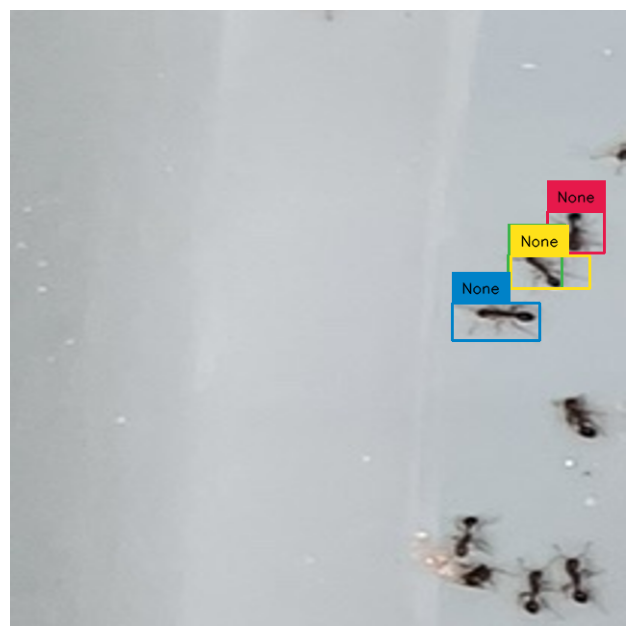

In [123]:
det = ls_det[3]
det.plot_image()

## Synthesize images

In [101]:
from matplotlib import pyplot as plt
import numpy as np
import random
def paste_objects(image, mask_list, xyxy_list, canvas_size=(640, 640, 3)):
    # Create an empty canvas
    canvas = np.zeros(canvas_size, dtype=np.uint8)
    h, w, d = canvas_size

    for mask, xyxy in zip(mask_list, xyxy_list):
        # Extract the object from the mask using the bounding box
        x1, y1, x2, y2 = xyxy
        # extend mask to 3 channels
        mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        obj = np.multiply(mask, image)[y1:y2, x1:x2]
        # randomly rotate
        angle = random.randint(0, 360)
        obj = Image.fromarray(obj)
        obj = obj.rotate(angle)
        obj = np.array(obj)
        oh, ow, _ = obj.shape
        
        # Randomly choose a position in the canvas where the object will be pasted
        max_x = w - ow
        max_y = h - oh
        pos_x = random.randint(0, max_x)
        pos_y = random.randint(0, max_y)

        # Paste the object onto the canvas
        canvas[pos_y:pos_y + oh, pos_x:pos_x + ow] += obj

    # set background by avg color
    idx_non_black = np.any(canvas != [0, 0, 0], axis=-1)
    idx_black = np.all(canvas == [0, 0, 0], axis=-1)
    # Get the non-black pixels.
    non_black_pixels = canvas[idx_non_black]
    # Compute and return the average color.
    avg_color = non_black_pixels.mean(axis=0)
    # Set the black pixels to the average color.
    canvas[idx_black] = avg_color
    return canvas

[     108.76      109.27      113.18]
640
640


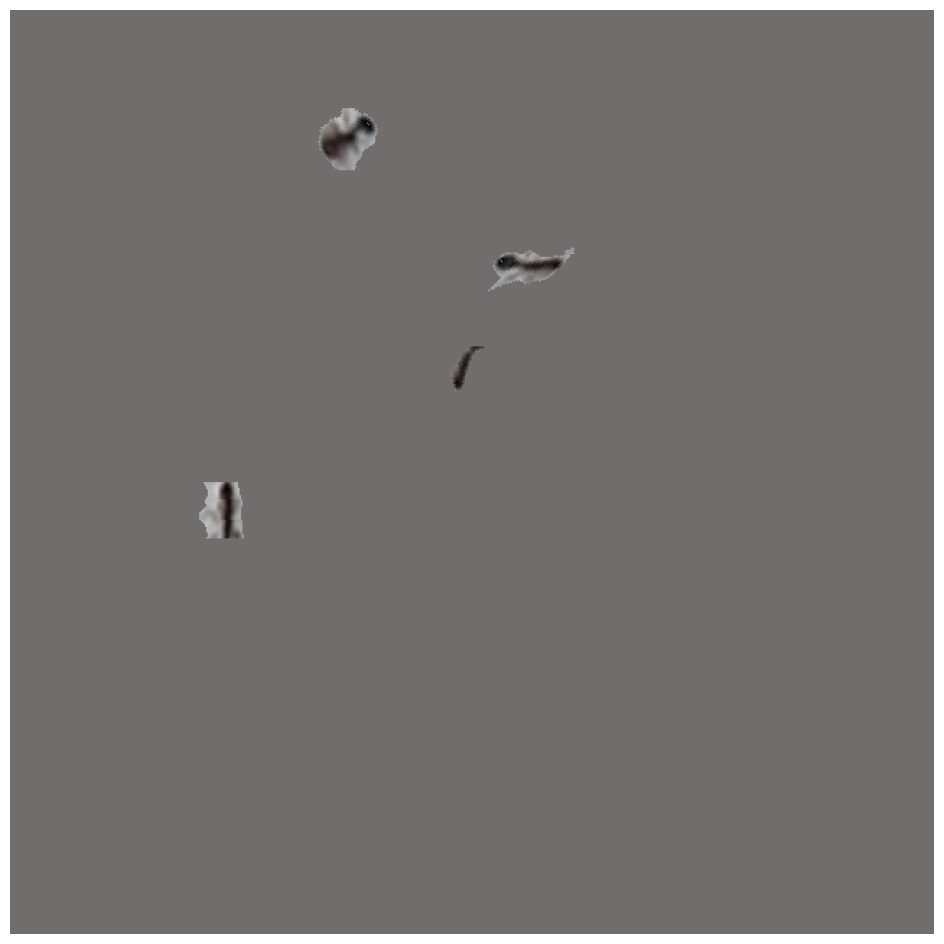